In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
%matplotlib notebook

from brainpipe.system import study
from brainpipe.visual import BorderPlot, addLines
from brainpipe import *
import itertools
import mne.connectivity as mnecon
from mne.connectivity import spectral_connectivity
from mne.viz import circular_layout, plot_connectivity_circle
import pandas as pd

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 4278 connections
    using t=0.500s..2.500s for estimation (2049 points)
fmin corresponds to less than 5 cycles, spectrum estimate will be unreliable
    computing connectivity for the bands:
     band 1: 1.5Hz..4.0Hz (6 points)
     band 2: 4.5Hz..8.0Hz (8 points)
     band 3: 8.5Hz..15.0Hz (14 points)
     band 4: 15.5Hz..30.0Hz (30 points)
     band 5: 30.5Hz..60.0Hz (60 points)
     band 6: 60.5Hz..90.0Hz (60 points)
    connectivity scores will be averaged for each band
    using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLV
    computing connectivity for epoch 1


<ipython-input-1-671d22d0934b>:76: RuntimeWarning: fmin corresponds to less than 5 cycles, spectrum estimate will be unreliable
  fmax=fmax,tmin = 0.5,tmax = 2.5,faverage=True, mt_adaptive=False, n_jobs=1)


    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    comp

<ipython-input-1-671d22d0934b>:80: RuntimeWarning: fmin corresponds to less than 5 cycles, spectrum estimate will be unreliable
  fmax=fmax,tmin = 0.5,tmax = 2.5,faverage=True, mt_adaptive=False, n_jobs=1)


    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    comp

<IPython.core.display.Javascript object>


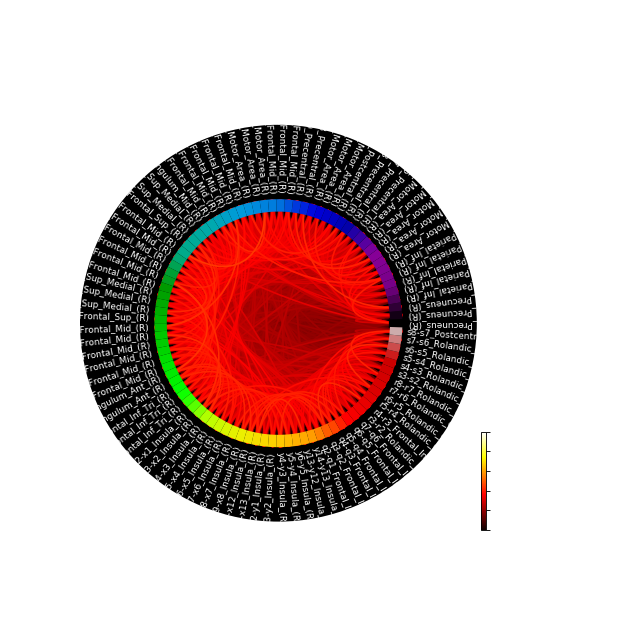

<IPython.core.display.Javascript object>


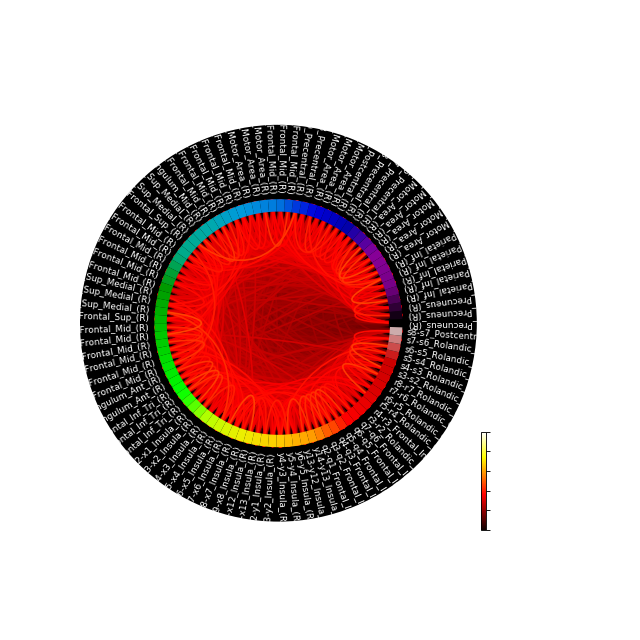

<IPython.core.display.Javascript object>


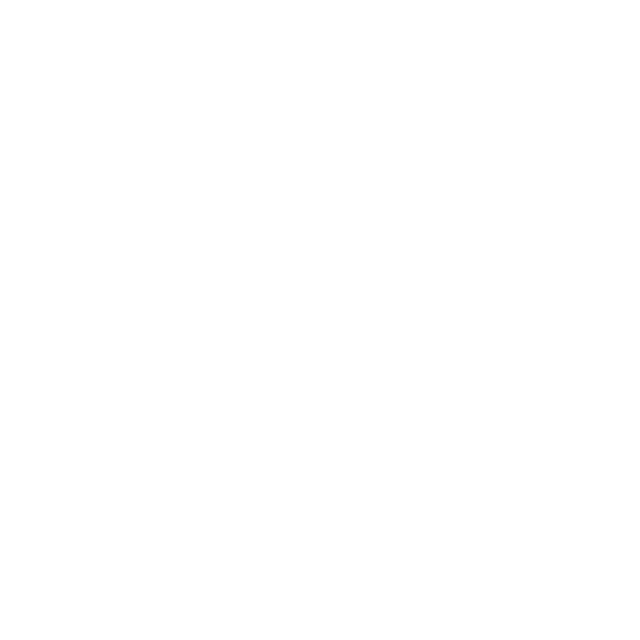

<IPython.core.display.Javascript object>


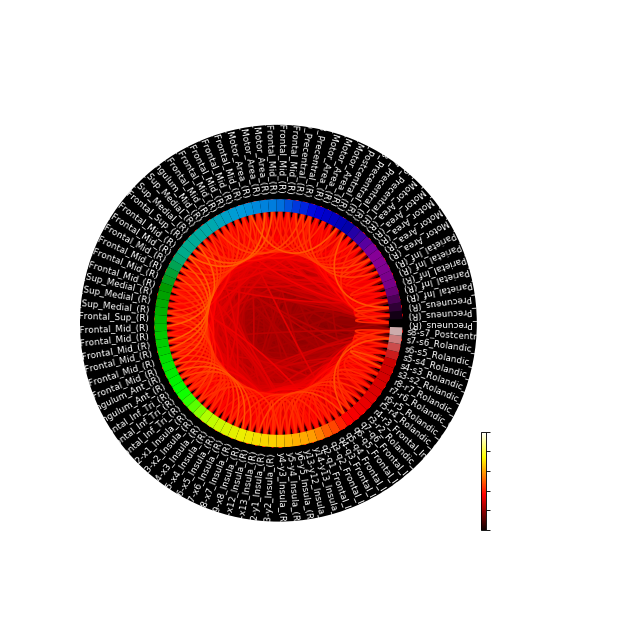

<IPython.core.display.Javascript object>


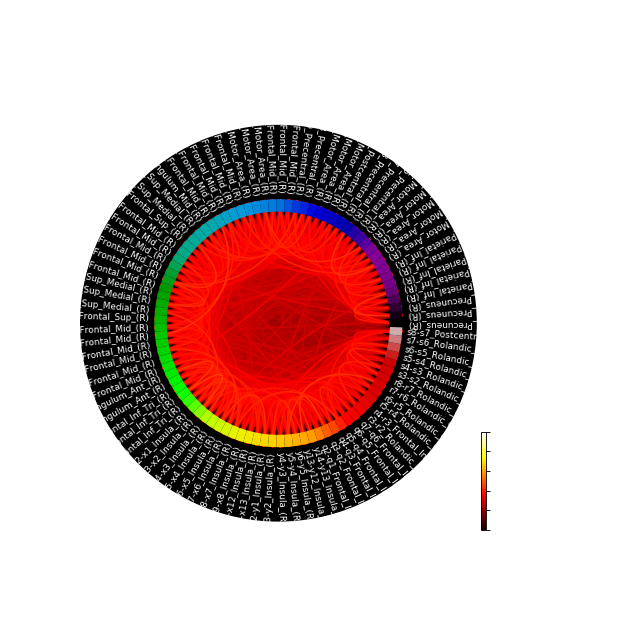

<IPython.core.display.Javascript object>


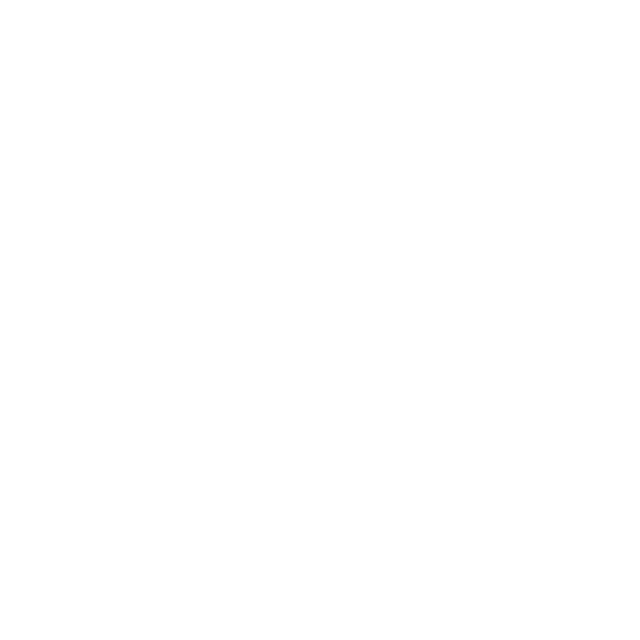

<IPython.core.display.Javascript object>


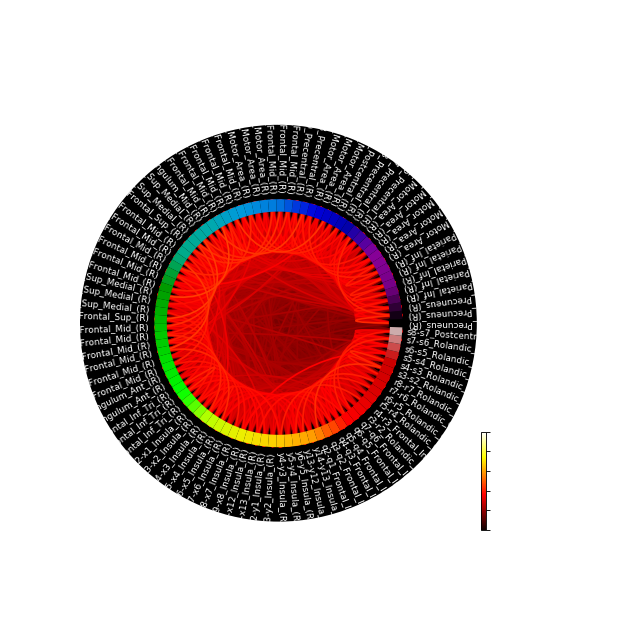

<IPython.core.display.Javascript object>


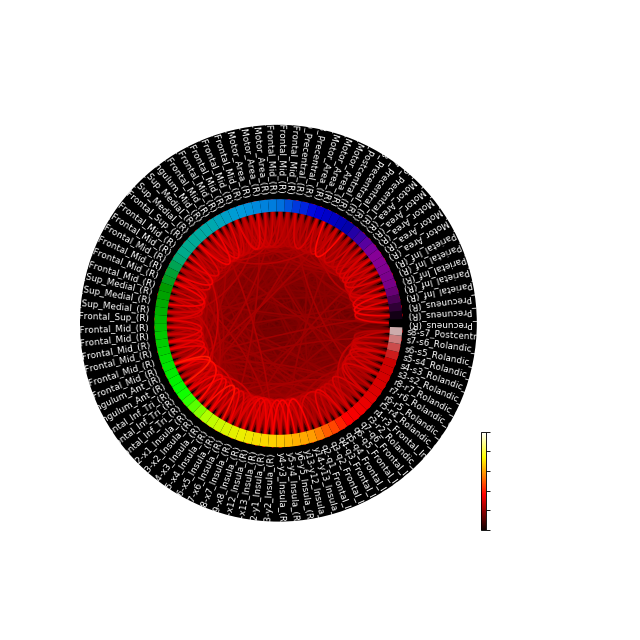

<IPython.core.display.Javascript object>


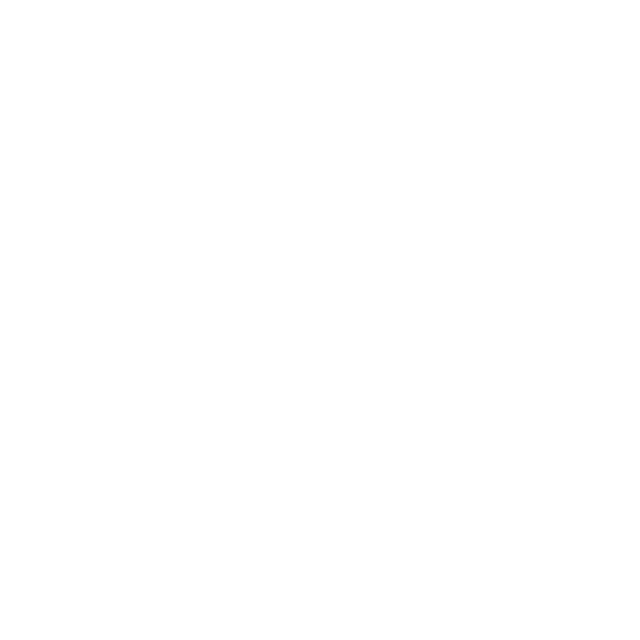

<IPython.core.display.Javascript object>


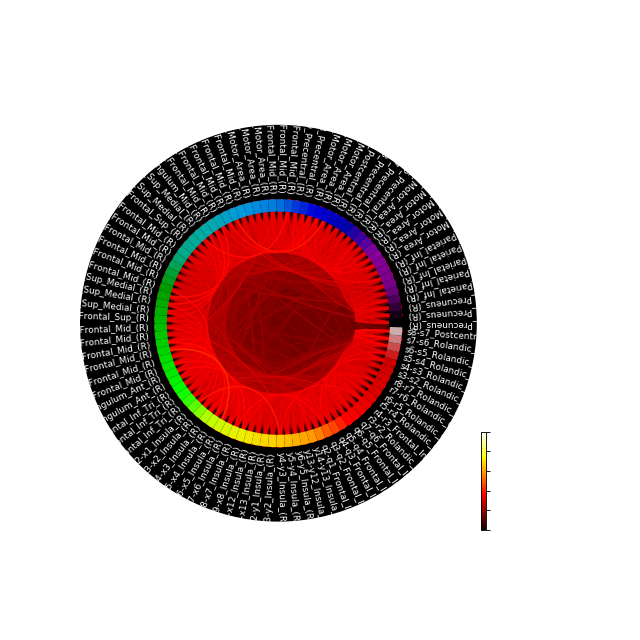

<IPython.core.display.Javascript object>


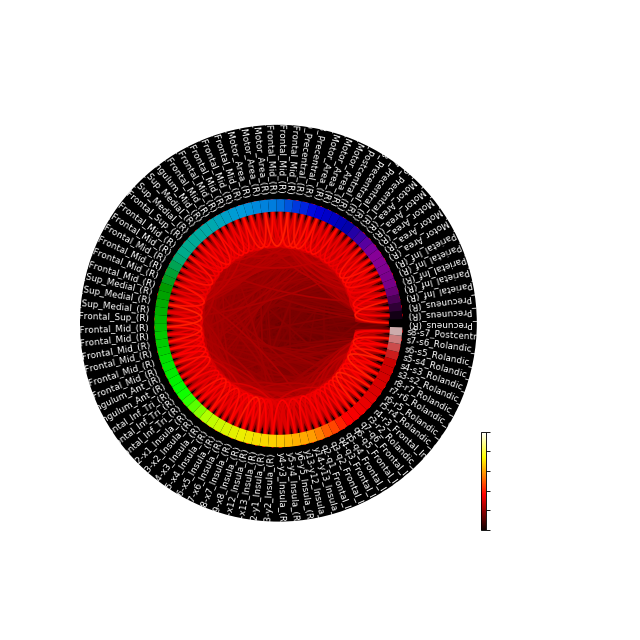

<IPython.core.display.Javascript object>


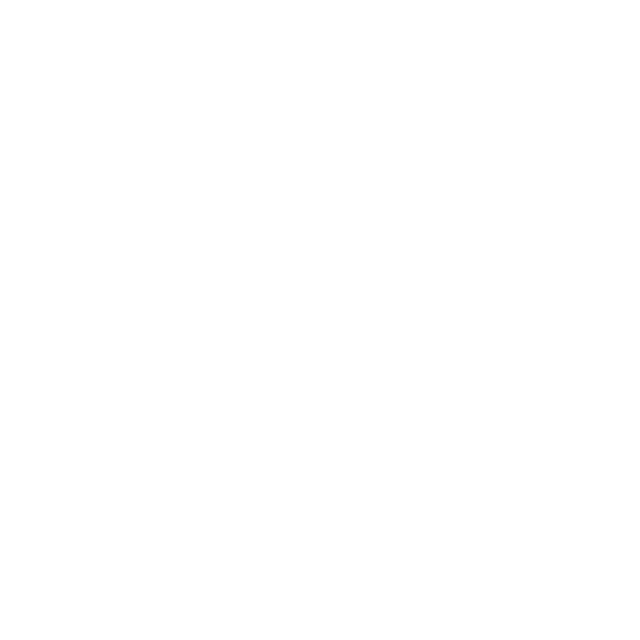

<IPython.core.display.Javascript object>


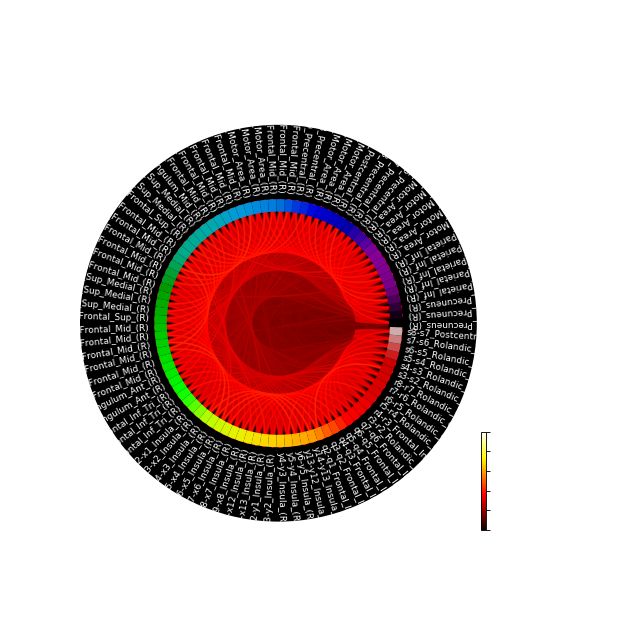

<IPython.core.display.Javascript object>


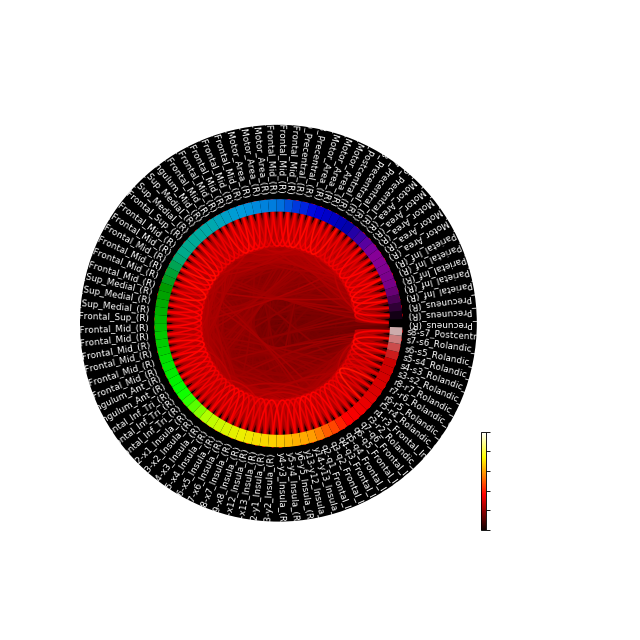

<IPython.core.display.Javascript object>


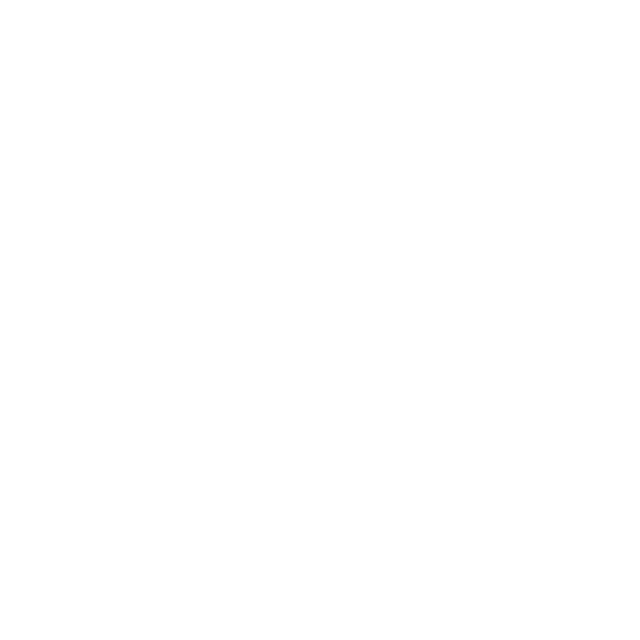

<IPython.core.display.Javascript object>


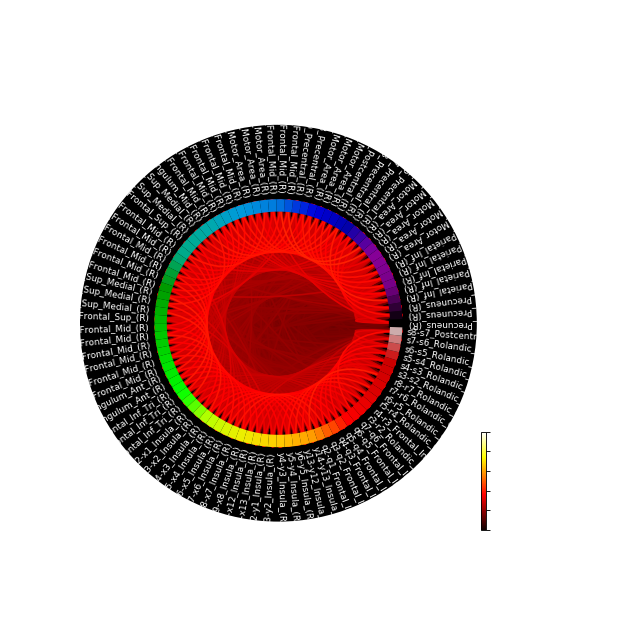

<IPython.core.display.Javascript object>


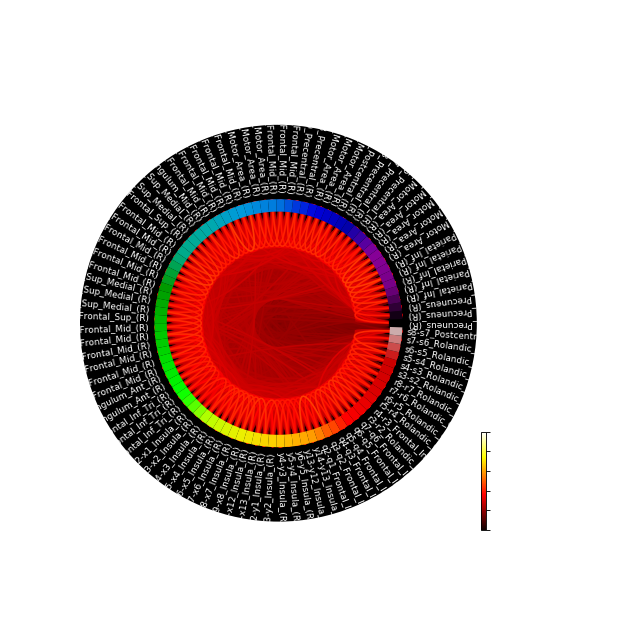

<IPython.core.display.Javascript object>


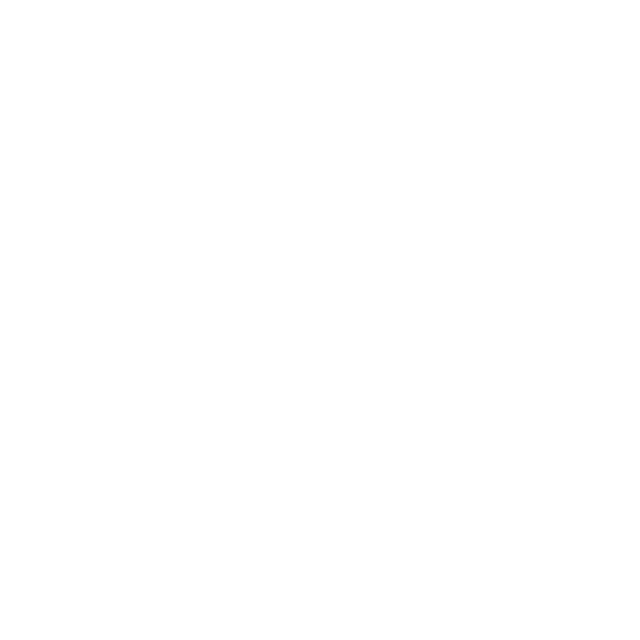

In [1]:
subjects = ['Martin']
name_trigg_1 = ['402']
name_trigg_2 = ['502']
name_trigg_3 = ['702']
name_trigg_4 = ['802']

sfreq = 512 # the sampling frequency
con_method = ['plv']

f_name = ['delta','theta','alpha','beta','gamma_low','gamma_high']
fmin = (1.,4.,8.,15.,30.,60.)
fmax = (4.,8.,15.,30.,60.,90.)

p = '/home/thomasthiery/Dropbox/iEEG_decision_making/Occulo/'

for s in subjects:
    path_grp = p + 'data_base/'+ s +'/bip/'
    grp = np.load(path_grp+ s +'_chan_bip.npy')
    grp = grp.tolist()
    
    path_phys = p + 'data_base/'+s+'/physio/'
    physio = pd.read_csv(path_phys+'Phys.csv',usecols=['Text','brodmann','aal','X','Y','Z'])
    phys_temp = [] 
    for xxx in range(physio['Text'].shape[0]):
        phys_temp.append(physio['Text'][xxx]+'_'+physio['aal'][xxx])
    phys = np.array(phys_temp)


    for n1, n2,n3,n4 in zip(name_trigg_1, name_trigg_2,name_trigg_3, name_trigg_4):
        nb_triggs = n1 + '_' + n2 +'_minus_'+ n3 + '_' + n4 
        
        
        file1 = s +'_x_bip_'+n1+'.npy'
        file2 = s +'_x_bip_'+n2+'.npy'
                
        file3 = s +'_x_bip_'+n3+'.npy'
        file4 = s +'_x_bip_'+n4+'.npy'

        mat1 = np.load(path_grp + file1)
        mat2 = np.load(path_grp + file2)
        mat1 = np.concatenate((mat1,mat2),axis=2)
        
        
        mat3 = np.load(path_grp + file3)
        mat4 = np.load(path_grp + file4)
        mat2 = np.concatenate((mat3,mat4),axis=2)
        
        n_elec_1, npts_1, n_trials_1 = mat1.shape[0],mat1.shape[1],mat1.shape[2]
        n_elec_2, npts_2, n_trials_2 = mat2.shape[0],mat2.shape[1],mat2.shape[2]

        mat1= np.reshape(mat1,(n_trials_1,n_elec_1,npts_1))
        mat2= np.reshape(mat2,(n_trials_2,n_elec_2,npts_2))

        con_1, freqs_1, times_1, n_epochs_1, n_tapers_1 = mnecon.spectral_connectivity(
        mat1,method=con_method, mode='multitaper', sfreq=sfreq, fmin=fmin,
        fmax=fmax,tmin = 0.5,tmax = 2.5,faverage=True, mt_adaptive=False, n_jobs=1)

        con_2, freqs_2, times_2, n_epochs_2, n_tapers_2 = mnecon.spectral_connectivity(
        mat2,method=con_method, mode='multitaper', sfreq=sfreq, fmin=fmin,
        fmax=fmax,tmin = 0.5,tmax = 2.5,faverage=True, mt_adaptive=False, n_jobs=1)
        
        con = con_1 - con_2
        
        for i ,f in enumerate(f_name):
            savepath = p + str(con_method)+ '/'+nb_triggs+'/'
            directory = os.path.dirname(savepath)
            if not os.path.exists(directory):
                os.makedirs(directory)
            np.save(savepath +str(con_method)+'_'+f+'_'+s+'_'+ n1 + '_' + n2 +'.npy',con_1)
            np.save(savepath +str(con_method)+'_'+f+'_'+s+'_'+ n3 + '_' + n4 +'.npy',con_2)
            
            plot_connectivity_circle(con_1[:,:,i], phys,
                 title='Instructed',vmin=0, vmax=1)

            plt.savefig(savepath+'fig_'+f+'_'+s+ '_'+ n1 + '_' + n2 +'.png', 
            dpi=300, bbox_inches='tight')

            plot_connectivity_circle(con_2[:,:,i], phys,
                 title='Free',vmin=0, vmax=1)

            plt.savefig(savepath+'fig_'+f+'_'+s+ '_'+ n3 + '_' + n4 + '.png', 
            dpi=300, bbox_inches='tight')

            plot_connectivity_circle(con[:,:,i], phys,
                 title='Instructed minus Free',colormap='jet')

            plt.savefig(savepath+'fig_'+f+'_'+s+ '_'+nb_triggs+ '.png', 
            dpi=300, bbox_inches='tight')

            plt.clf()
            plt.close()

<IPython.core.display.Javascript object>


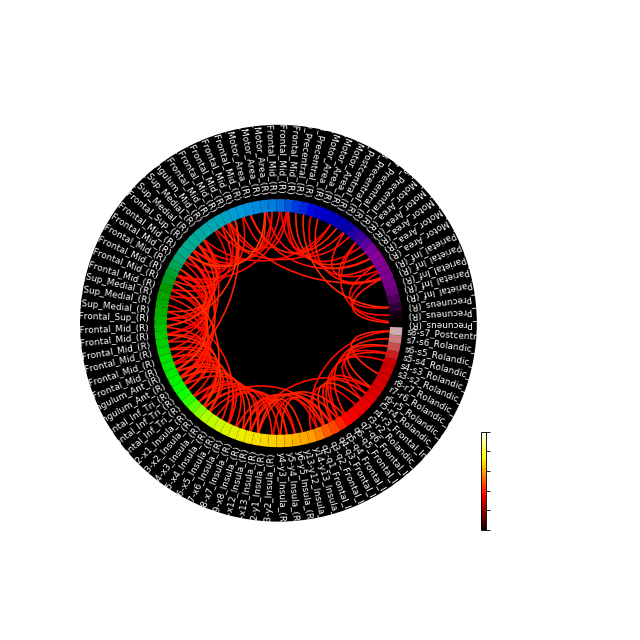

<IPython.core.display.Javascript object>


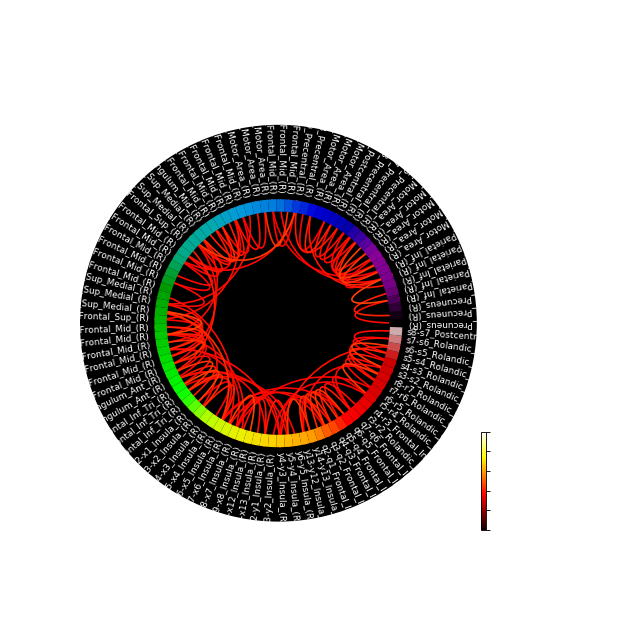

<IPython.core.display.Javascript object>


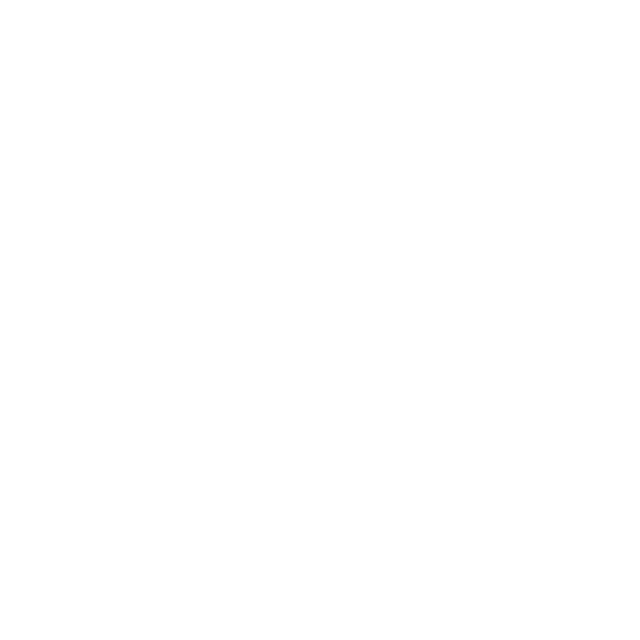

<IPython.core.display.Javascript object>


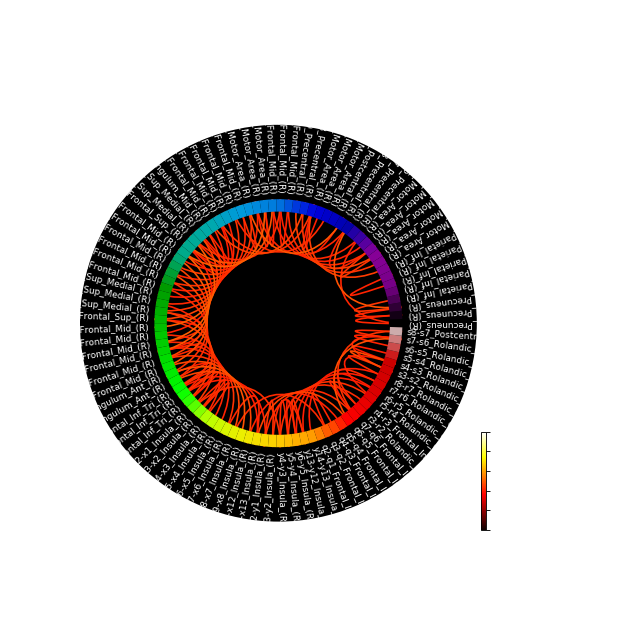

<IPython.core.display.Javascript object>


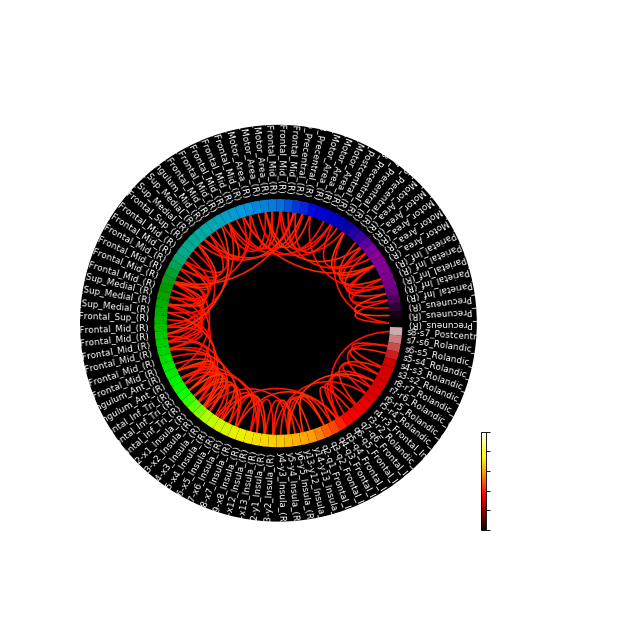

<IPython.core.display.Javascript object>


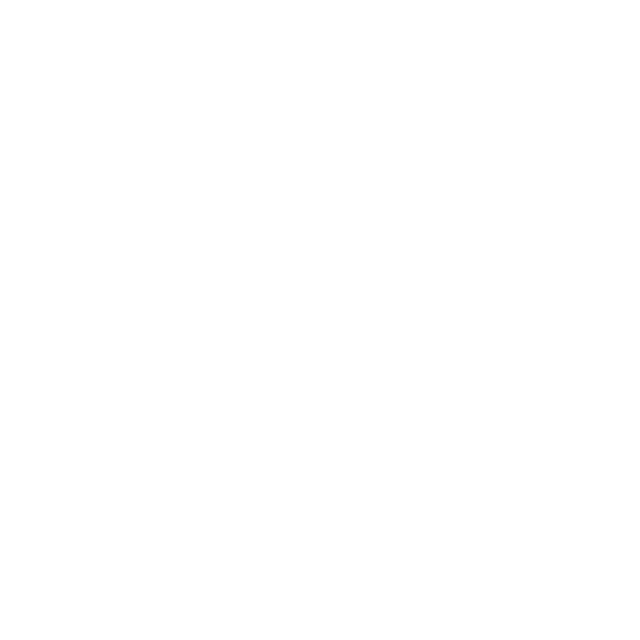

<IPython.core.display.Javascript object>


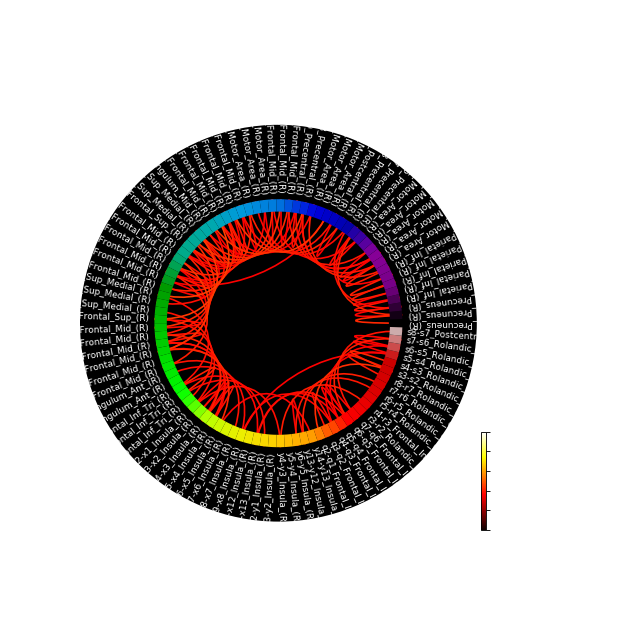

<IPython.core.display.Javascript object>


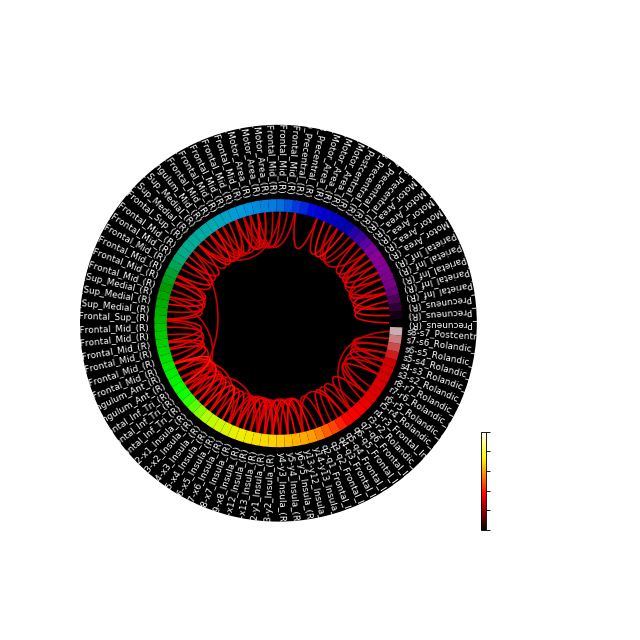

<IPython.core.display.Javascript object>


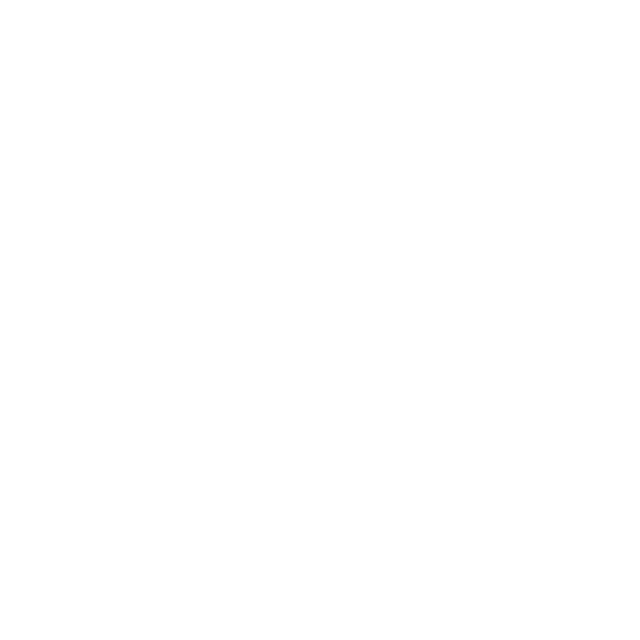

<IPython.core.display.Javascript object>


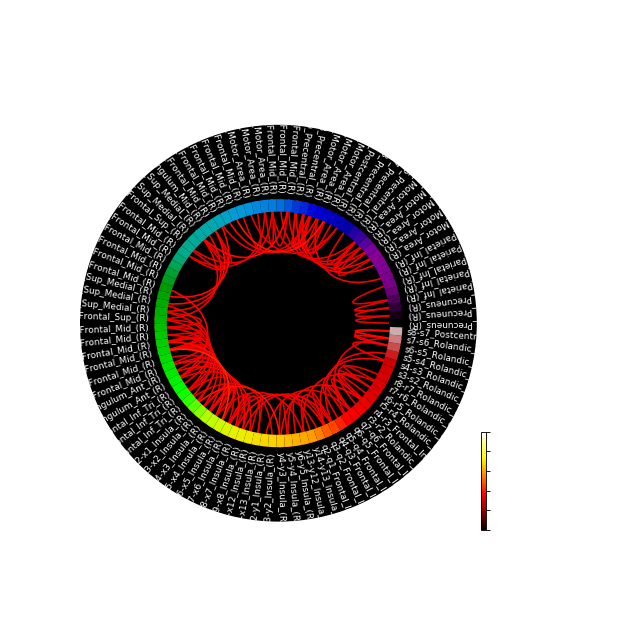

<IPython.core.display.Javascript object>


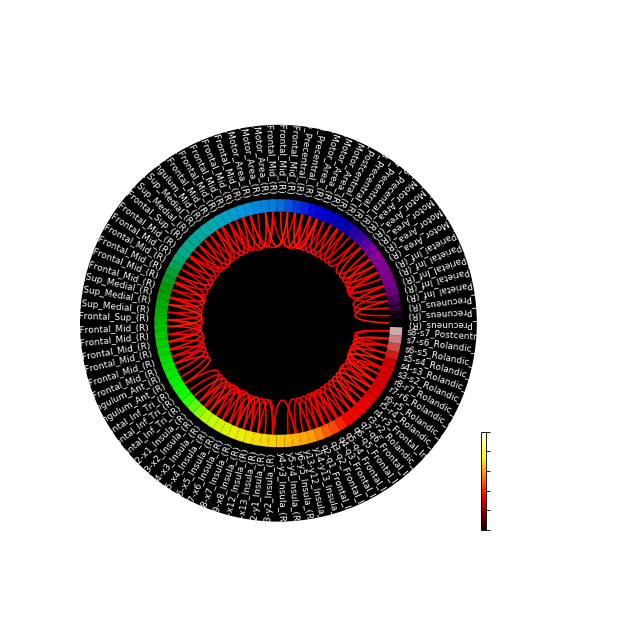

/home/thomasthiery/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


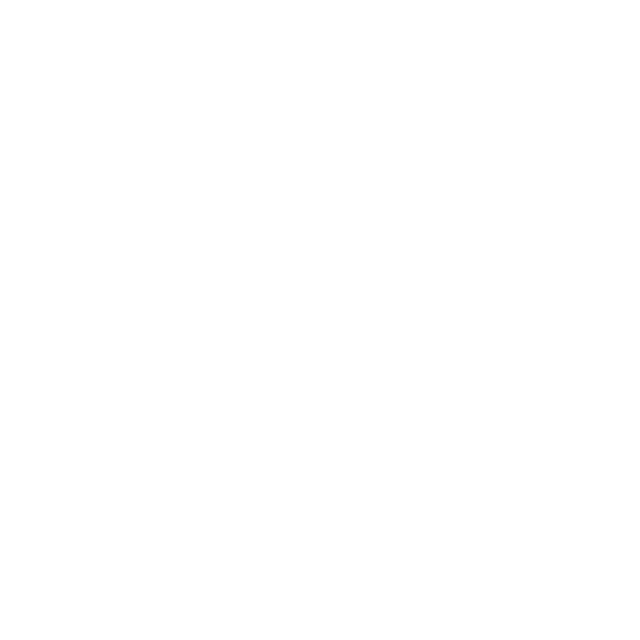

<IPython.core.display.Javascript object>


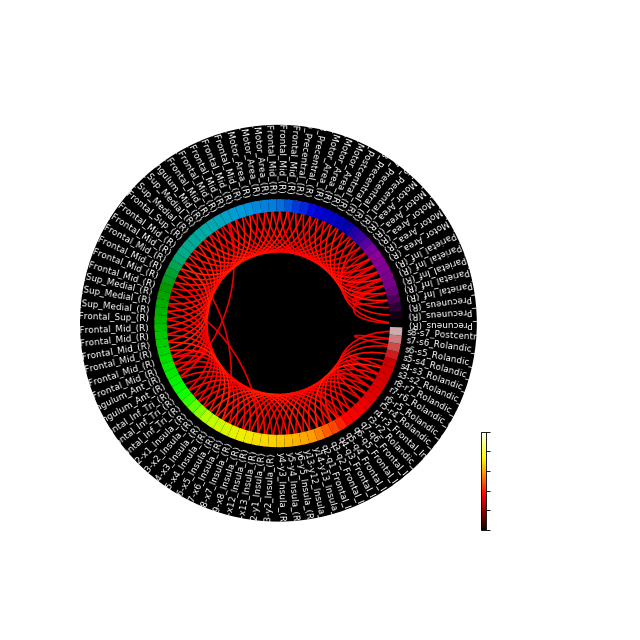

<IPython.core.display.Javascript object>


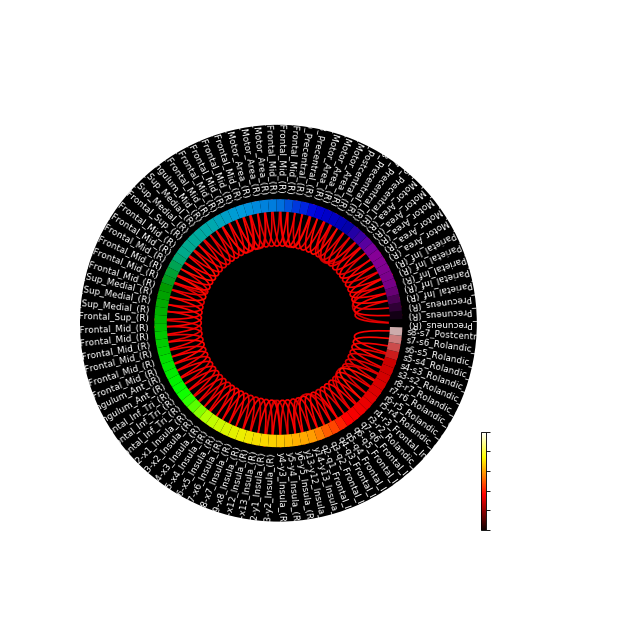

<IPython.core.display.Javascript object>


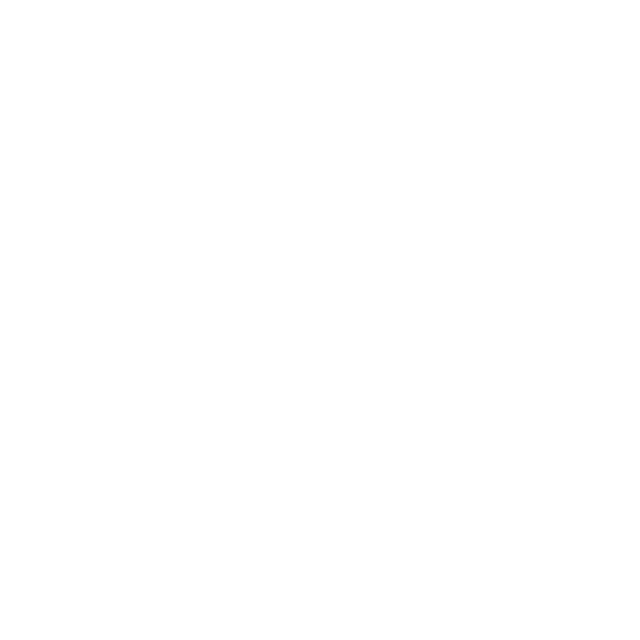

<IPython.core.display.Javascript object>


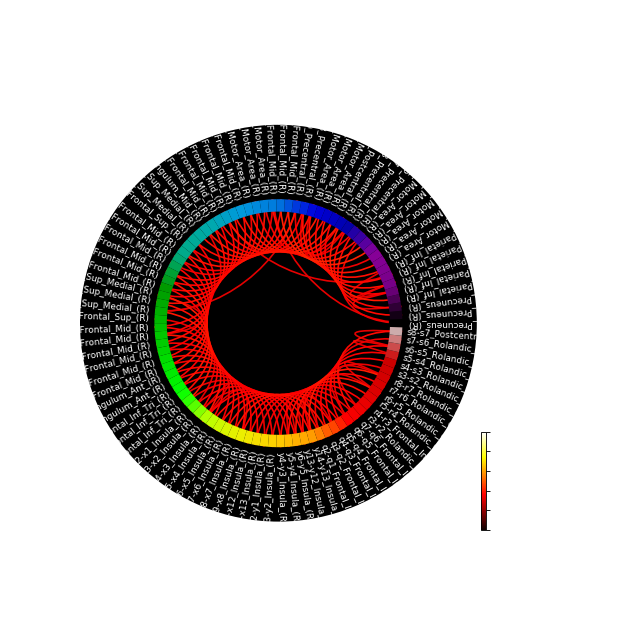

<IPython.core.display.Javascript object>


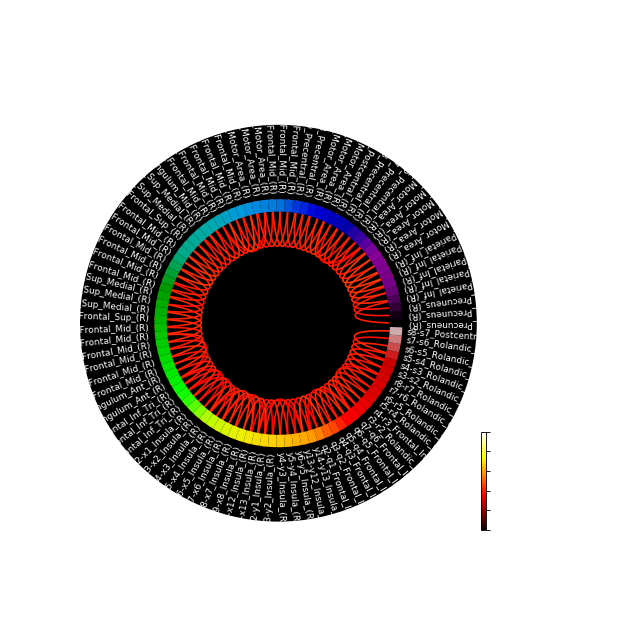

<IPython.core.display.Javascript object>


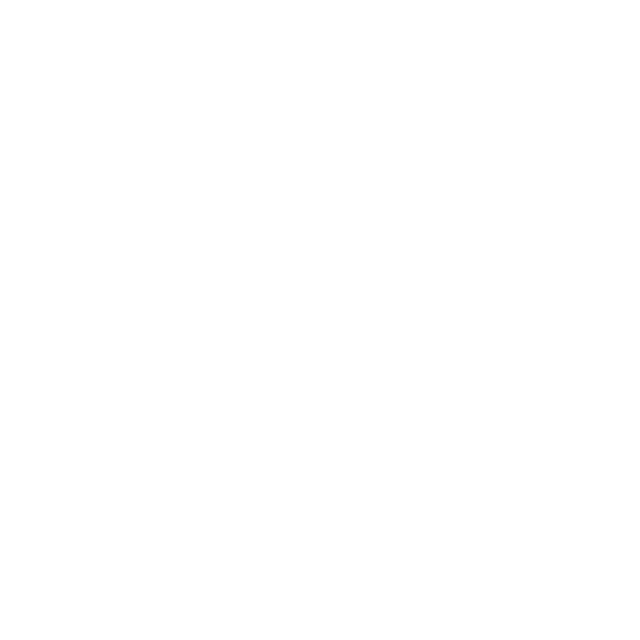

In [3]:
for i ,f in enumerate(f_name):
            savepath = p + str(con_method)+ '/'+nb_triggs+'/'
            directory = os.path.dirname(savepath)
            if not os.path.exists(directory):
                os.makedirs(directory)
            np.save(savepath +str(con_method)+'_'+f+'_'+s+'_'+ n1 + '_' + n2 +'.npy',con_1)
            np.save(savepath +str(con_method)+'_'+f+'_'+s+'_'+ n3 + '_' + n4 +'.npy',con_2)
            
            plot_connectivity_circle(con_1[:,:,i], phys,n_lines=100,
                 title='Instructed',vmin=0, vmax=1)

            plt.savefig(savepath+'fig_'+f+'_'+s+ '_'+ n1 + '_' + n2 +'.png', 
            dpi=300, bbox_inches='tight')

            plot_connectivity_circle(con_2[:,:,i], phys,n_lines=100,
                 title='Free',vmin=0, vmax=1)

            plt.savefig(savepath+'fig_'+f+'_'+s+ '_'+ n3 + '_' + n4 + '.png', 
            dpi=300, bbox_inches='tight')

            plot_connectivity_circle(con[:,:,i], phys,n_lines=100,
                 title='Instructed minus Free',colormap='jet')

            plt.savefig(savepath+'fig_'+f+'_'+s+ '_'+nb_triggs+ '.png', 
            dpi=300, bbox_inches='tight')

            plt.clf()
            plt.close()

In [ ]:
%matplotlib inline
from nilearn import plotting

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)

plot_matrices(con[:,:,:])
# plotting.plot_connectome(mean_correlation_matrix, msdl_coords,
#                          title='mean correlation over 13 ADHD subjects')